In [677]:
import pandas as pd
import numpy as np
from matplotlib import pyplot  as plt
import seaborn as sns
import matplotlib

In [678]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [679]:
df1.shape

(13320, 9)

In [680]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [681]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [682]:
df1["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [683]:
df1["size"].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [684]:
df1["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [685]:
df1["balcony"].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

# **DATA CLEANING**

In [686]:
#DROPPING COLUMNS

df2 = df1.drop(["area_type","availability","society","balcony"],axis=1)

In [687]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


**HANDLING NULL VALUES**

In [688]:
df3 = df2.dropna()
df3.shape

(13246, 5)

# **FEATURE ENGINEERING**

**CREATE A NEW COLUMN 'BHK'**

In [689]:
df3["bhk"] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

/var/folders/vl/l17yt_jx1kdgs6w9y_b_wtjr0000gn/T/ipykernel_51089/2222732687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [690]:
df3 = df3.drop("size",axis=1)

**TRANSFORMING total_sqft into NUMERICAL FORMAT**

In [691]:
def is_float(x) :
    try:
        float(x)
    except:
        return False
    return True
    

In [692]:
df3[~df3['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [693]:
df3['total_sqft'][~df3['total_sqft'].apply(is_float)].values[0:30]

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249'], dtype=object)

Above shows that 'total_sqft' column has values in ranges . So we will replace it with the average value. 
Also there are few other values such as Sq. Yards , Sq. Meter,Guntha . But we will drop such values since they are very few.

In [694]:
def convert_sqft_to_num(x):
    parts = x.split('-')
    if len(parts) == 2:
        return ( float(parts[0]) + float(parts[1]))/2
    try:
        return float(x)
    except:
        return None    #return None for non-numeric or problematic values 

In [695]:
df4 = df3.copy()

In [696]:
df4['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df4.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [697]:
#Dropping the rows with null values
df4=df4.dropna()
df4.shape

(13200, 5)

**CREATING A NEW COLUMN 'price_per_sqft'**

In [698]:
df5 = df4.copy()
df5['price_per_sqft'] = (df5['price']*100000/df5['total_sqft']).round(2)
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00


**EXAMINE 'location' COLUMN**

In [699]:
df5["location"] = df5["location"].apply(lambda x : x.strip())

## **OUTLIER REMOVAL**

In [700]:
df5.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920759e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678300e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267700e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438335e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317070e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


**Total sqft per bedroom size**

Usually , total sqft per bedroom is around 300 . So , considering that, I am keeping a threshold of 300 total sqft per bedroom.

In [701]:
df5[df5["total_sqft"]/df5["bhk"]<300].head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
9,Gandhi Bazar,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.30
70,Double Road,500.0,3.0,100.0,3,20000.00
78,Kaval Byrasandra,460.0,1.0,22.0,2,4782.61
89,Rajaji Nagar,710.0,6.0,160.0,6,22535.21
119,Hennur Road,276.0,3.0,23.0,2,8333.33
129,Vishwapriya Layout,950.0,7.0,115.0,7,12105.26
149,Dinnur,1034.0,5.0,185.0,6,17891.68


We can clearly sew few datas which are unrealistic for eg : 6BHK with 1020total sqft and 1407total sqft ; 8BHK in 600total sqft.
so , removing them from the dataset.

In [702]:
df6 = df5[~(df5["total_sqft"]/df5["bhk"]<300)]
df6.shape

(12456, 6)

**Unrealistic bathroom counts per apartment**

Some data have unusual numbers of bathroom per house. 
If we consider a house with 3 bedrooms , we know that each bedroom would have a bathroom.
Even if we assume a guest bathroom in addition to the bathrooms in the bedrooms;
A practical scenario would be ,
The no.of bathrooms in a house = The number of bedrooms it has + 1 extra bathroom.

In [703]:
df6[(df6.bath > df6.bhk+1)]

,location,total_sqft,bath,price,bhk,price_per_sqft
84,EPIP Zone,1499.0,5.0,102.0,3,6804.54
209,Padmanabhanagar,1736.0,6.0,190.0,4,10944.70
337,Thigalarapalya,3122.0,6.0,230.0,4,7367.07
490,Old Madras Road,4500.0,7.0,337.0,5,7488.89
524,Jakkur,5230.0,6.0,465.0,4,8891.01
...,...,...,...,...,...,...
13092,Hebbal,4000.0,6.0,440.0,4,11000.00
13095,Sathya Sai Layout,6652.0,6.0,660.0,4,9921.83
13119,Sathya Sai Layout,6688.0,6.0,700.0,4,10466.51
13180,Sarakki Nagar,3124.0,6.0,349.0,4,11171.57


So lets remove the data which says that a house has more bathrooms than the number of bedrooms it has + 1

In [704]:
df7 = df6[(df6.bath <= df6.bhk+1)]
df7.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12303.000000,12303.000000,12303.000000,12303.000000,12303.000000
mean,1565.187910,2.517922,107.215860,2.631147,6246.906946
std,1232.948436,0.996490,138.612897,0.958671,4062.126459
min,300.000000,1.000000,9.000000,1.000000,267.830000
25%,1113.000000,2.000000,49.000000,2.000000,4200.060000
50%,1297.000000,2.000000,69.000000,3.000000,5272.730000
75%,1684.000000,3.000000,112.000000,3.000000,6860.375000
max,52272.000000,16.000000,2912.000000,16.000000,176470.590000


**Remove Extreme Outliers from price_per_sqft**

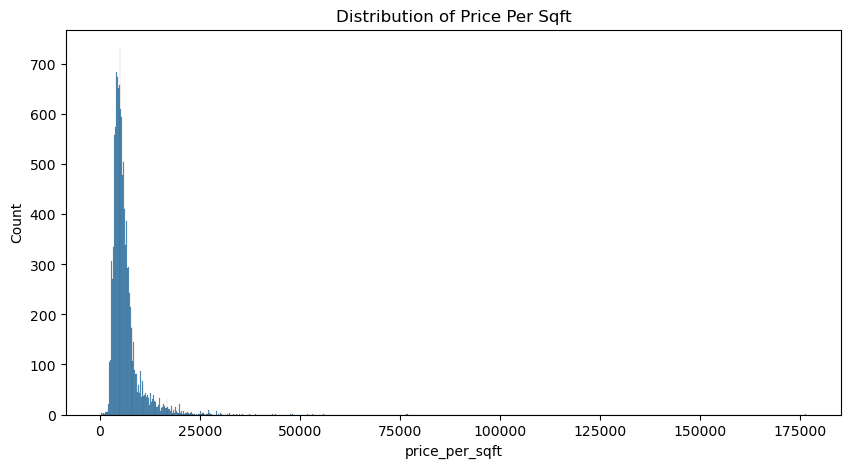

In [705]:
plt.figure(figsize=(10,5))
sns.histplot(df7.price_per_sqft)
plt.title("Distribution of Price Per Sqft")
plt.show()

price_per_sqft depends on the location, so ,lets compare houses with other houses in the same location and remove outliers which are way off from the local average.

In [706]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8 = remove_pps_outliers(df7)
df8.shape

(9175, 6)

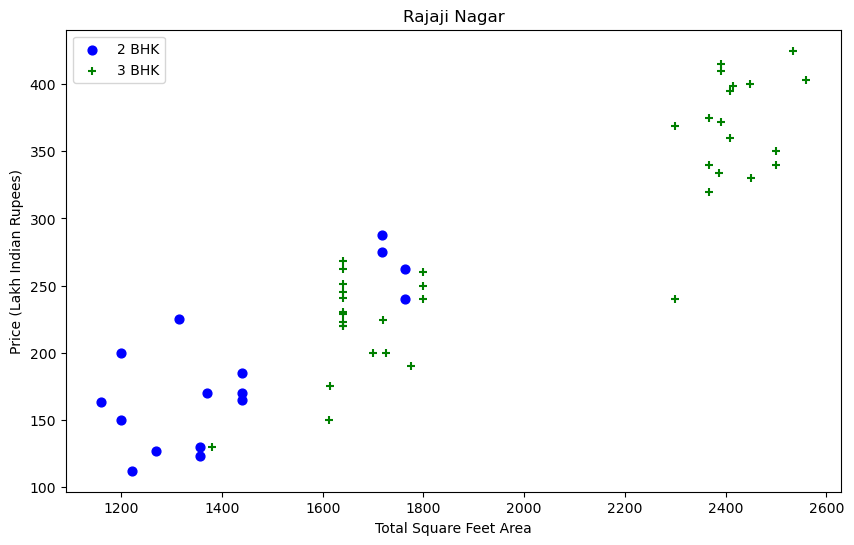

In [707]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (10,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=40)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=40)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8,"Rajaji Nagar")

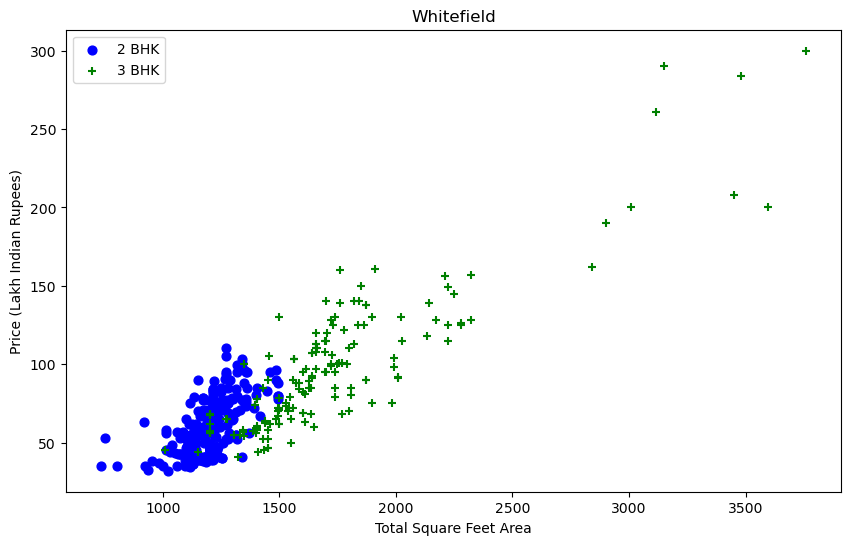

In [708]:
plot_scatter_chart(df8,"Whitefield")

**Removing extreme outliers from price**

In [709]:
def remove_bhk_price_anomalies1(df):
    df = df.copy()
    
    # Round total_sqft to nearest 100 for grouping
    df['rounded_sqft'] = df['total_sqft'].apply(lambda x: round(x / 400) * 400)

    outlier_indices = []

    # First: Find all groups with less than 3 records and mark them as outliers
    group_sizes = df.groupby(['location', 'rounded_sqft', 'bhk']).size()
    small_groups = group_sizes[group_sizes < 3]

    for (location, sqft, bhk), size in small_groups.items():
        # Get indices of all houses in this small group and mark as outliers
        indices = df[(df['location'] == location) & 
                     (df['rounded_sqft'] == sqft) & 
                     (df['bhk'] == bhk)].index.tolist()
        outlier_indices.extend(indices)

    # Now remove these small groups from df before price anomaly detection
    df_filtered = df.drop(index=outlier_indices)

    # Group by location and rounded total_sqft
    grouped = df_filtered.groupby(['location', 'rounded_sqft'])

    for (location, sqft), group in grouped:
        bhk_groups = group.groupby('bhk')
        bhk_mean_price = {}

        # Calculate mean price only for BHK groups with at least 3 records (already ensured by filtering)
        for bhk, bhk_df in bhk_groups:
            bhk_mean_price[bhk] = bhk_df['price'].mean()

        # Compare prices: higher BHK should not be cheaper than lower BHK average
        for bhk, bhk_df in bhk_groups:
            if (bhk - 1) in bhk_mean_price:
                mean_lower_bhk_price = bhk_mean_price[bhk - 1]
                for idx, row in bhk_df.iterrows():
                    if row['price'] < mean_lower_bhk_price:
                        outlier_indices.append(idx)

    # Separate outliers and cleaned data
    df_outliers = df.loc[outlier_indices].drop(columns='rounded_sqft')
    df_cleaned = df.drop(index=outlier_indices).drop(columns='rounded_sqft')

    return df_cleaned, df_outliers
df9, df_outliers = remove_bhk_price_anomalies1(df8)
print(f"Cleaned (price) data shape: {df9.shape}")
print(f"Outliers (price) shape: {df_outliers.shape}")

Cleaned (price) data shape: (6551, 6)
Outliers (price) shape: (2624, 6)


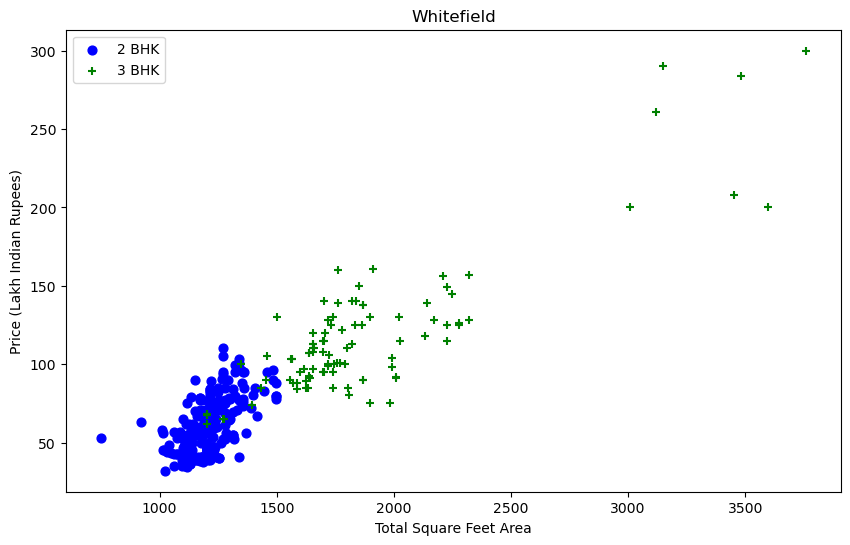

In [710]:
plot_scatter_chart(df9,"Whitefield")


Now that , 'price_per_sqft' was used to remove the outlier,it can be dropped to model the dataset

In [711]:
df10 = df9.drop(columns='price_per_sqft', axis=1)
df10.shape

(6551, 5)

**Removing extreme values from total_sqft**

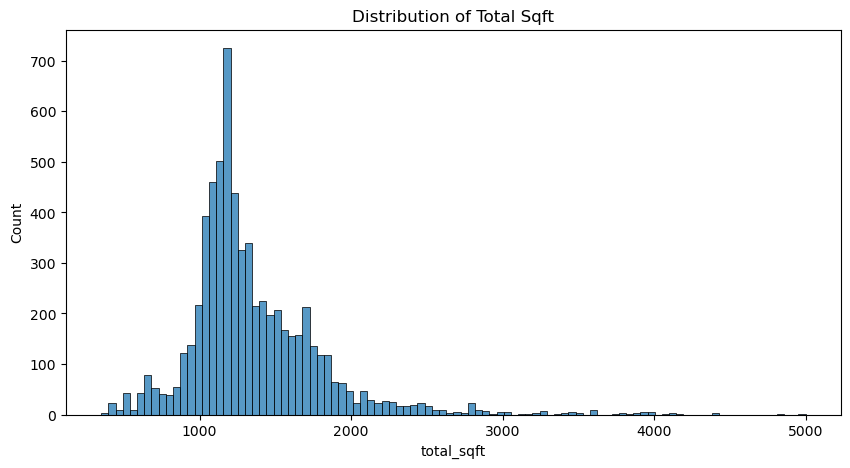

In [712]:
plt.figure(figsize=(10,5))
sns.histplot(df10.total_sqft)
plt.title("Distribution of Total Sqft")
plt.show()

In [763]:
df11 = df10[df10.total_sqft < df10.total_sqft.quantile(0.997)]
df11.describe()

,total_sqft,bath,price,bhk
count,6530.000000,6530.000000,6530.000000,6530.000000
mean,1348.057013,2.294640,76.883144,2.388668
std,431.784565,0.658499,52.573873,0.604973
min,350.000000,1.000000,10.000000,1.000000
25%,1100.000000,2.000000,47.250000,2.000000
50%,1243.000000,2.000000,64.130000,2.000000
75%,1540.000000,3.000000,89.000000,3.000000
max,3913.000000,5.000000,864.000000,4.000000


**Removing rare locations**

In [764]:
location_stats = df11["location"].value_counts()
print(f"Number of unique locations : {len(location_stats)}")
print(f"Number of locations with more than 5 data points : {len(location_stats[location_stats>5])}")
print(f"Number of locations with 5 or less than 5 data points : {len(location_stats[location_stats<=5])}")
location_stats_less_than_5 = location_stats[location_stats <= 5]

# Replace rare locations with "other"
df11["location"] = df11["location"].apply(lambda x: 'other' if x in location_stats_less_than_5 else x)
df11["location"].value_counts()

Number of unique locations : 291
Number of locations with more than 5 data points : 196
Number of locations with 5 or less than 5 data points : 95


/var/folders/vl/l17yt_jx1kdgs6w9y_b_wtjr0000gn/T/ipykernel_51089/948938618.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11["location"] = df11["location"].apply(lambda x: 'other' if x in location_stats_less_than_5 else x)


location
Whitefield         380
other              332
Sarjapur  Road     260
Electronic City    240
Uttarahalli        158
                  ... 
Banagiri Nagar       6
Prithvi Layout       6
Kenchenahalli        6
Kodihalli            6
Chamrajpet           6
Name: count, Length: 197, dtype: int64

In [765]:
df12 = df11[df11['location'].str.lower() != 'other']
df12.describe()

,total_sqft,bath,price,bhk
count,6198.000000,6198.000000,6198.000000,6198.000000
mean,1350.131717,2.295257,76.787584,2.388512
std,435.525277,0.663447,52.342131,0.608485
min,350.000000,1.000000,10.000000,1.000000
25%,1100.000000,2.000000,47.000000,2.000000
50%,1243.000000,2.000000,65.000000,2.000000
75%,1549.000000,3.000000,89.820000,3.000000
max,3913.000000,5.000000,864.000000,4.000000


## **SMOOTHED MEAN ENCODING**

In [766]:
def smoothed_mean_encoding(train_df,col="location",target="price",m=5):
    global_mean = train_df[target].mean()
    agg = train_df.groupby(col)[target].agg(['mean', 'count']).reset_index()
    # smoothed value
    agg['smoothed'] = (agg['count'] * agg['mean'] + m * global_mean) / (agg['count'] + m)
    # Map each category in df[column] to its smoothed value
    smooth_map = dict(zip(agg[col], agg['smoothed']))
    # Return encoded column and mapping
    return train_df[col].map(smooth_map), smooth_map

## **MODEL BUILDING**

In [767]:
X = df12.drop(columns = 'price' , axis=1)
y = df12['price']

In [768]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [769]:
#Apply smoothed encoding on training set
X_train_enc, smooth_map = smoothed_mean_encoding(
    pd.concat([X_train, y_train], axis=1), 
    col="location", target="price",  m=5)
X_train = X_train.copy()
X_train['location'] = X_train_enc

In [770]:
#Any new categories in test data not seen in training will get the global_mean value.

global_mean = y_train.mean()

X_test = X_test.copy()
X_test['location'] = X_test['location'].map(smooth_map).fillna(global_mean)

In [771]:
# -----------------------
# Scaling for regression models
# -----------------------
from sklearn.preprocessing import StandardScaler
X_train_scal = X_train.copy()
X_test_scal = X_test.copy()

numerical_cols = ['total_sqft', 'bath', 'bhk']
scaler = StandardScaler()
X_train_scal[numerical_cols] = scaler.fit_transform(X_train_scal[numerical_cols])
X_test_scal[numerical_cols] = scaler.transform(X_test_scal[numerical_cols])

In [772]:
# -----------------------
# Log transforming 'price'
# -----------------------

y_train_log = np.log1p(y_train) 

In [785]:
# -----------------------
# MODELS THAT NEED SCALING
# -----------------------
# print("\n--- Models with Scaling ---")
# from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
# from sklearn.svm import SVR
# from sklearn.metrics import r2_score
# lr = LinearRegression()
# lr.fit(X_train_scal, y_train_log)
# y_pred_log = lr.predict(X_test_scal)
# y_pred = np.expm1(y_pred_log)
# print("R² Score (Linear Regression):", r2_score(y_test,y_pred))

# ridge = Ridge(alpha=1.0)
# ridge.fit(X_train_scal, y_train_log)
# y_pred_log = ridge.predict(X_test_scal)
# y_pred = np.expm1(y_pred_log)
# print("R² Score (Ridge):", r2_score(y_test,y_pred ))

# lasso = Lasso(alpha=0.1, max_iter=10000)
# lasso.fit(X_train_scal, y_train_log)
# y_pred_log = lasso.predict(X_test_scal)
# y_pred = np.expm1(y_pred_log)
# print("R² Score (Lasso):", r2_score(y_test,y_pred))

# elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
# elastic.fit(X_train_scal, y_train_log)
# y_pred_log = elastic.predict(X_test_scal)
# y_pred = np.expm1(y_pred_log)
# print("R² Score (ElasticNet):", r2_score(y_test,y_pred))

# svr_rbf = SVR(kernel='rbf', C=100, epsilon=0.1)
# svr_rbf.fit(X_train_scal, y_train_log)
# y_pred_log = svr_rbf.predict(X_test_scal)
# y_pred = np.expm1(y_pred_log)
# print("R² Score (SVR - RBF):",r2_score(y_test,y_pred))

# -----------------------
# TREE-BASED MODELS (No Scaling)
# -----------------------
from sklearn.ensemble import RandomForestRegressor
print("\n--- Models without Scaling ---")
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train_log)
y_pred_log = rf_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
print("R² Score (Random Forest):", r2_score(y_test, y_pred))


from xgboost import XGBRegressor
xgb_model =XGBRegressor( objective='reg:squarederror',min_child_weight=1,
    n_estimators=600, learning_rate=0.05,reg_lambda = 1,reg_alpha = 0,
    max_depth=5, colsample_bytree=0.8,
    subsample=1.0, random_state=42)
xgb_model.fit(X_train, y_train_log)
y_pred_log = xgb_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
print("R² Score (XGBRegressor):", r2_score(y_test,y_pred))


--- Models without Scaling ---
R² Score (Random Forest): 0.9002523769003935
R² Score (XGBRegressor): 0.9097617528906967


## **Use RandomizedSearchCV**

In [786]:

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

param_dist = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 300, 400, 500, 600, 700],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_lambda': [1, 7, 10, 50],
    'reg_alpha': [0, 0.1, 1, 5],
    'min_child_weight': [1, 5, 7]
}

xgb = XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',
    random_state=42
)

# Log-transform y for training
y_train_log = np.log1p(y_train)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=60,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train_log)

print("Best Params:", random_search.best_params_)
print("Best CV MAE (log space):", -random_search.best_score_)



Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Params: {'subsample': 1.0, 'reg_lambda': 7, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best CV MAE (log space): 0.12036349444467916


## **Use K Fold cross validation to measure accuracy of our Random Forest Regression model**

In [787]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

cv = KFold(n_splits=5, shuffle=True, random_state=0)
mae_scores, mse_scores, r2_scores = [], [], []

for train_idx, test_idx in cv.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # Smoothed encoding
    df_train_cv = pd.concat([X_train_cv, y_train_cv], axis=1)
    X_train_cv['location'], smooth_map_cv = smoothed_mean_encoding(
        df_train_cv, col="location", target="price", m=5
    )
    global_mean_cv = y_train_cv.mean()
    X_test_cv['location'] = X_test_cv['location'].map(smooth_map_cv).fillna(global_mean_cv)

    # Log transform the target
    y_train_cv_log = np.log1p(y_train_cv)

    # Model
    model_cv = XGBRegressor(
        objective='reg:squarederror',
        min_child_weight=1,
        n_estimators=600,
        learning_rate=0.05,
        reg_lambda=1,
        reg_alpha=0,
        max_depth=5,
        colsample_bytree=0.8,
        subsample=1.0,
        random_state=42
    )
    
    model_cv.fit(X_train_cv, y_train_cv_log)
    y_pred_cv_log = model_cv.predict(X_test_cv)
    y_pred_cv = np.expm1(y_pred_cv_log)  # inverse transform

    mae_scores.append(mean_absolute_error(y_test_cv, y_pred_cv))
    mse_scores.append(mean_squared_error(y_test_cv, y_pred_cv))
    r2_scores.append(r2_score(y_test_cv, y_pred_cv))

print("\nCross Validation Results:")
print("MAE per fold:", mae_scores)
print("MSE per fold:", mse_scores)
print("R² per fold:", r2_scores)
print("\nAverage MAE:", np.mean(mae_scores))
print("Average MSE:", np.mean(mse_scores))
print("Average R²:", np.mean(r2_scores))



Cross Validation Results:
MAE per fold: [9.424661116846146, 9.03341279638967, 9.532891382401989, 9.549728229174793, 9.469373283878847]
MSE per fold: [224.11314662667527, 221.9198611519974, 209.9743922449105, 219.33771678762196, 235.2223024785533]
R² per fold: [0.9210998097351546, 0.9210318259463793, 0.9226946162089903, 0.9043412473681798, 0.9222380682190034]

Average MAE: 9.402013361738288
Average MSE: 222.11348385795168
Average R²: 0.9182811134955415


In [777]:
# CHECKING THE MODEL PERFORMANCE ON TRAIN AND TEST SETS FOR OVERFITTING
train_pred_log = xgb_model.predict(X_train)    # predictions in log space
test_pred_log  = xgb_model.predict(X_test)     # predictions in log space

# Convert back to original price scale
train_pred = np.expm1(train_pred_log)
test_pred  = np.expm1(test_pred_log)


from sklearn.metrics import mean_absolute_error, r2_score

print("Train MAE:", mean_absolute_error(y_train, train_pred))
print("Test  MAE:", mean_absolute_error(y_test, test_pred))
print("Train R² :", r2_score(y_train, train_pred))
print("Test  R² :", r2_score(y_test, test_pred))


Train MAE: 7.547126486248526
Test  MAE: 9.459826844553792
Train R² : 0.9544999673351876
Test  R² : 0.9097617528906967


## **Test the Model**

<Axes: xlabel='price', ylabel='Count'>

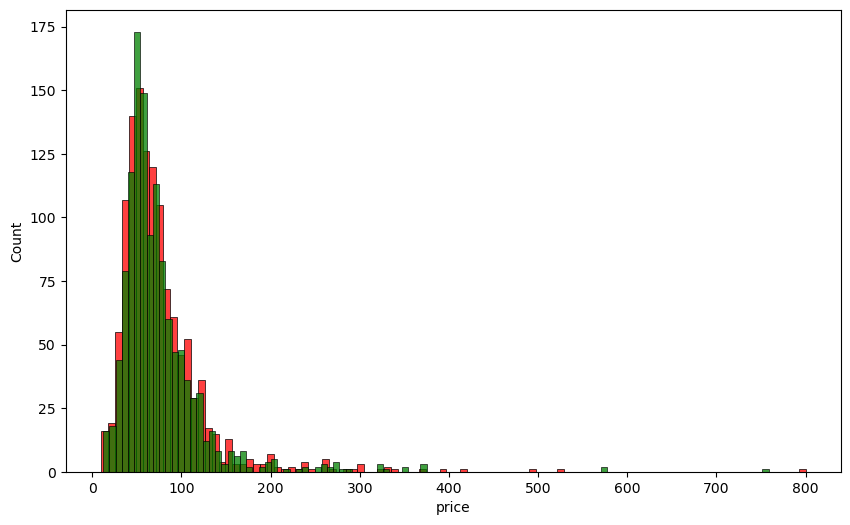

In [778]:
plt.figure(figsize=(10, 6))

# Plot histograms
sns.histplot(y_test,color="red")
sns.histplot(test_pred,color="green")

## **Export the model to a Pickle file**

In [779]:
# import pickle
# with open('banglore_home_prices_model_xgb.pickle','wb') as f:
#     pickle.dump(xgb_model,f)

## **Export the model to a Joblib file**

In [780]:
# import joblib
# joblib.dump(xgb_model, 'model.joblib')

## **Export location and column information to a file that will be useful later on in our prediction application**

In [781]:
# import json
# columns = list(X_train.columns)
# with open("columns.json", "w") as f:
#     json.dump(columns, f)

## **Export scaler**

In [782]:
# joblib.dump(scaler, 'scaler.joblib') 

## **Save smooth map and global mean**

In [783]:
# with open("global_mean.json", "w") as f:
#     json.dump({"global_mean": float(global_mean)}, f)

In [784]:

# smooth_map_dict = dict(smooth_map)
# with open("smooth_map.json", "w") as f:
#     json.dump(smooth_map_dict, f)